# (injury-statistics-work-related-claims-2018 Exploration)

## by (Omar Eldamsheety)

## Preliminary Wrangling

>  


 



### import all packages and set plots to be embedded inline

In [6]:
#import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

### Load in The dataset 

In [ ]:
df = pd.read_csv('injury-statistics-work-related-claims-2018.csv')

In [ ]:
df.head()

### The structure of the dataset:


In [7]:
df.shape

(113937, 81)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [8]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


### The main features of interest in the dataset?

- What factors affect a loan’s outcome status?

- What affects the borrower’s APR or interest rate?

- Are there differences between loans depending on how large the original loan amount was?

### The features in the dataset I think will help support my investigation into my features of interest?

ListingKey, LoanStatus, BorrowerAPR, BorrowerRate, LenderYield, IsBorrowerHomeowner, IncomeRange, StatedMonthlyIncome, LoanOriginalAmount, MonthlyLoanPayment


## Univariate Exploration



In [22]:
# defining a function to draw a bar plot.

def bar_plot(var, xlabel, ylabel, title):
    df[var].value_counts().plot(kind = 'bar', figsize = (15, 10))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

In [32]:
# defining a function to draw a hist plot.
def hist_plot(var, xlabel, ylabel, title):
    df[var].plot(kind = 'hist', figsize = (15, 10))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

### Loan Status:

In [10]:
df.LoanStatus.value_counts() 

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

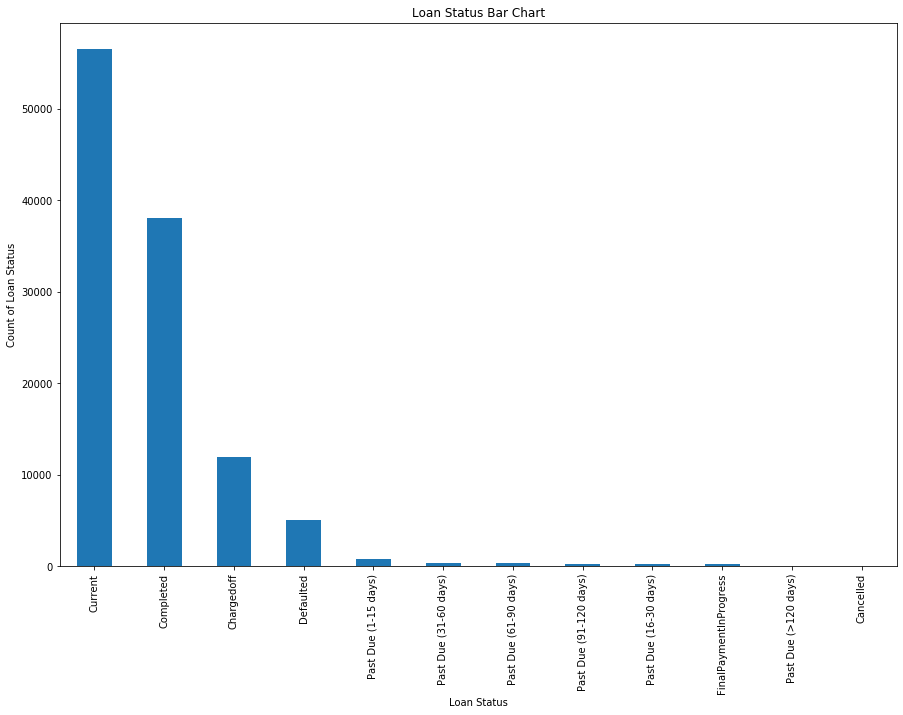

In [23]:
bar_plot('LoanStatus', 'Loan Status', 'Count of Loan Status', 'Loan Status Bar Chart')


The highest value of the Loan Status is Current and then Completed .

### Occupation:

In [18]:
df.Occupation.value_counts()

Other                          28617
Professional                   13628
Computer Programmer             4478
Executive                       4311
Teacher                         3759
                               ...  
Dentist                           68
Student - College Freshman        41
Student - Community College       28
Judge                             22
Student - Technical School        16
Name: Occupation, Length: 67, dtype: int64

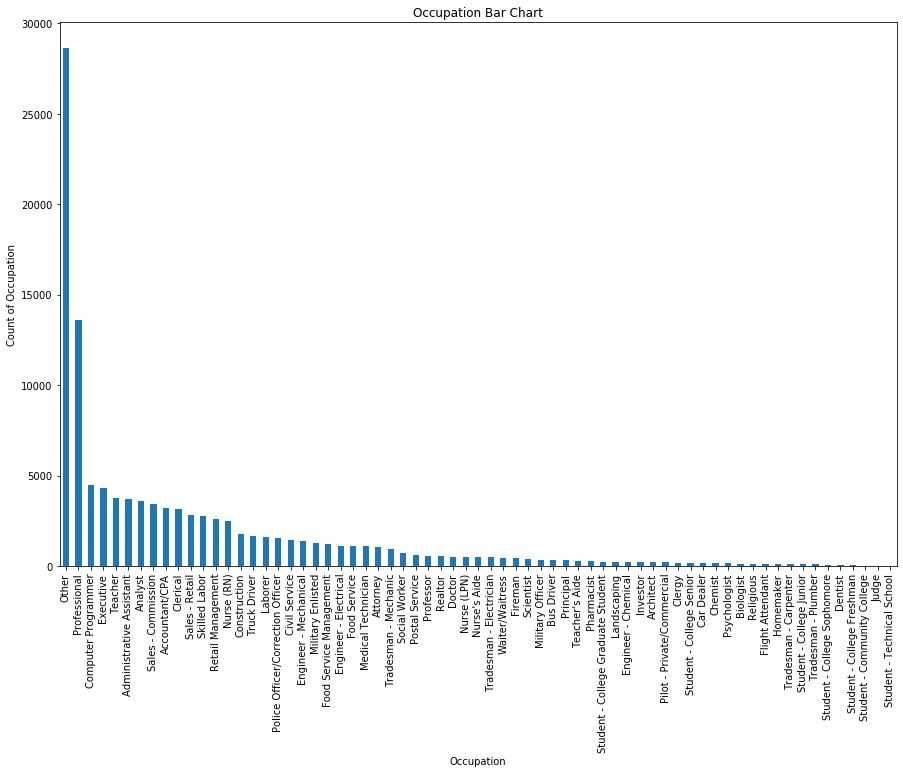

In [25]:
bar_plot('Occupation', 'Occupation', 'Count of Occupation', 'Occupation Bar Chart')


The highest value of Occupation is "Others" and this needs more clarifications ... they should write the exact Occupation ... The lowest value value is "Students" and this is understood ... But why Judge and Dentist No. is very low? .. this needs some studies.

### Employment Status:

In [11]:
df.EmploymentStatus.value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

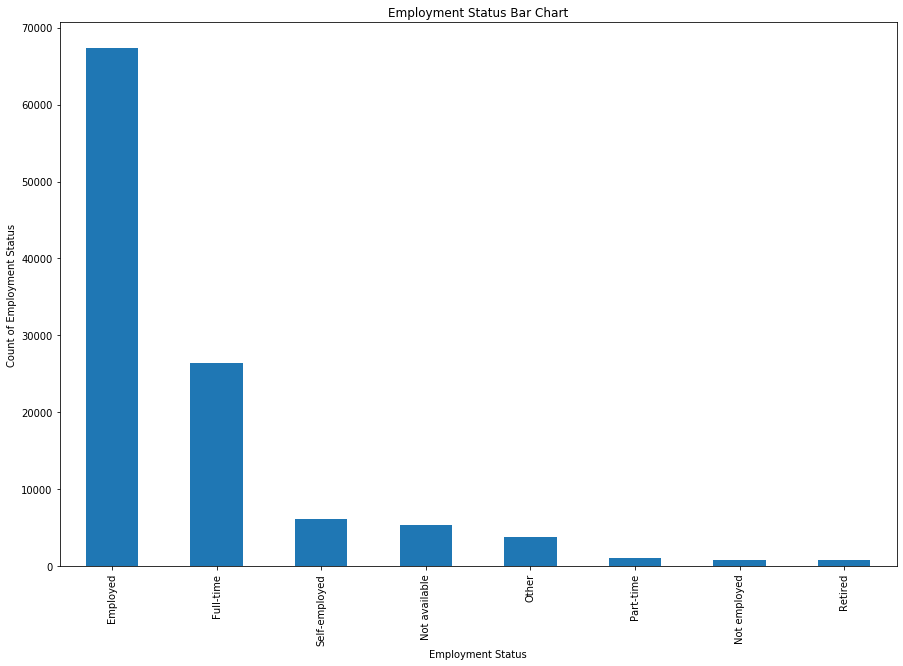

In [26]:
bar_plot('EmploymentStatus', 'Employment Status', 'Count of Employment Status', 'Employment Status Bar Chart')

It is logical that the Empolyed people are the hiest No. who can borrow money because they can return the money back.

### Is Borrower home owner:

In [13]:
df.IsBorrowerHomeowner.value_counts()

True     57478
False    56459
Name: IsBorrowerHomeowner, dtype: int64

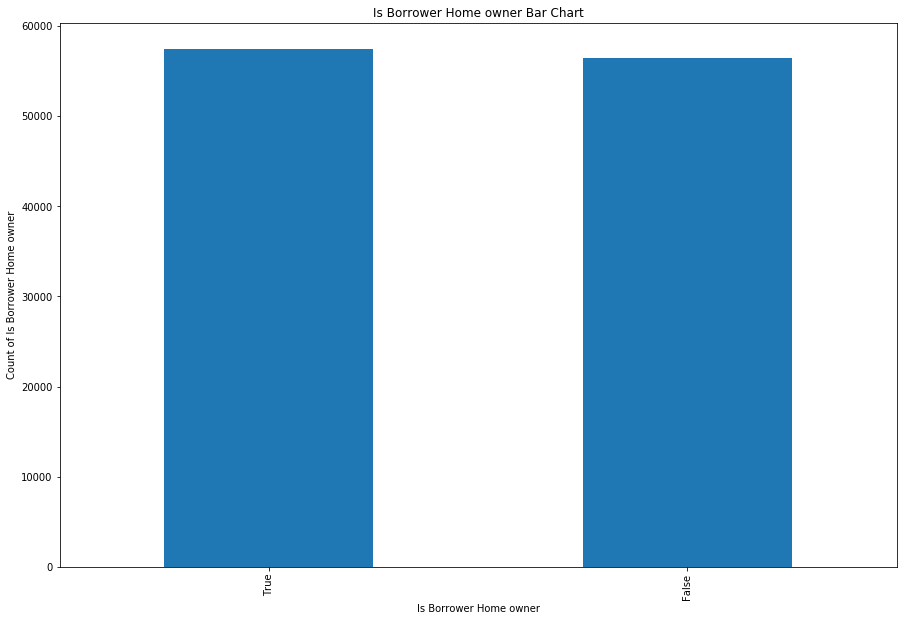

In [27]:
bar_plot('IsBorrowerHomeowner', 'Is Borrower Home owner', 'Count of Is Borrower Home owner', 'Is Borrower Home owner Bar Chart')

There is no big differnce between the people who own or don't own house.

### Loan Original Amount:

In [33]:
df.LoanOriginalAmount.value_counts()

4000     14333
15000    12407
10000    11106
5000      6990
2000      6067
         ...  
14383        1
6251         1
14447        1
6379         1
4098         1
Name: LoanOriginalAmount, Length: 2468, dtype: int64

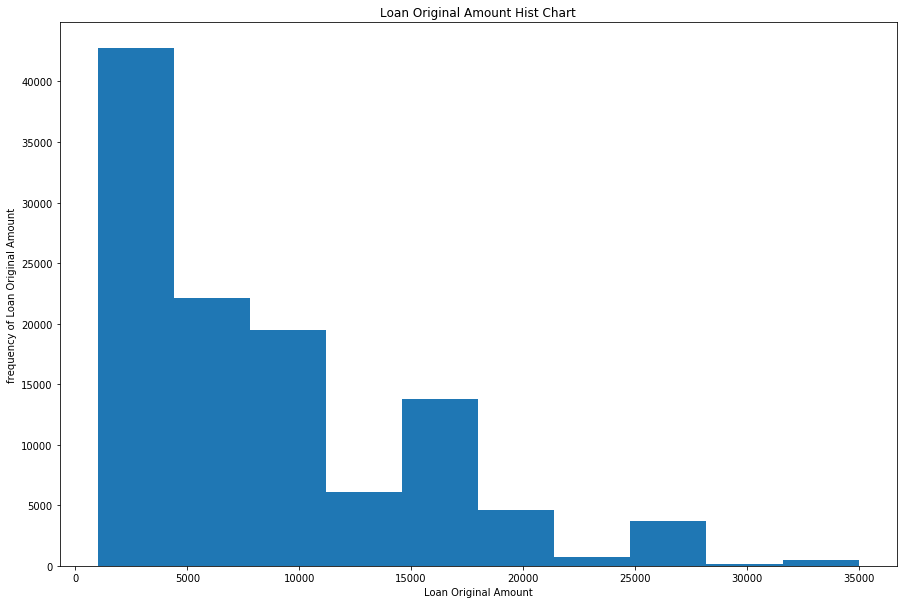

In [35]:
hist_plot('LoanOriginalAmount', 'Loan Original Amount', 'frequency of Loan Original Amount', 'Loan Original Amount Hist Chart')

Most of the people borrow less than 10000 $.

### Borrower APR
is the total cost of borrowing, including the interest rate plus any fees charged by the lender.

In [36]:
df.BorrowerAPR.value_counts()

0.35797    3672
0.35643    1644
0.37453    1260
0.30532     902
0.29510     747
           ... 
0.23014       1
0.22955       1
0.24844       1
0.30775       1
0.23457       1
Name: BorrowerAPR, Length: 6677, dtype: int64

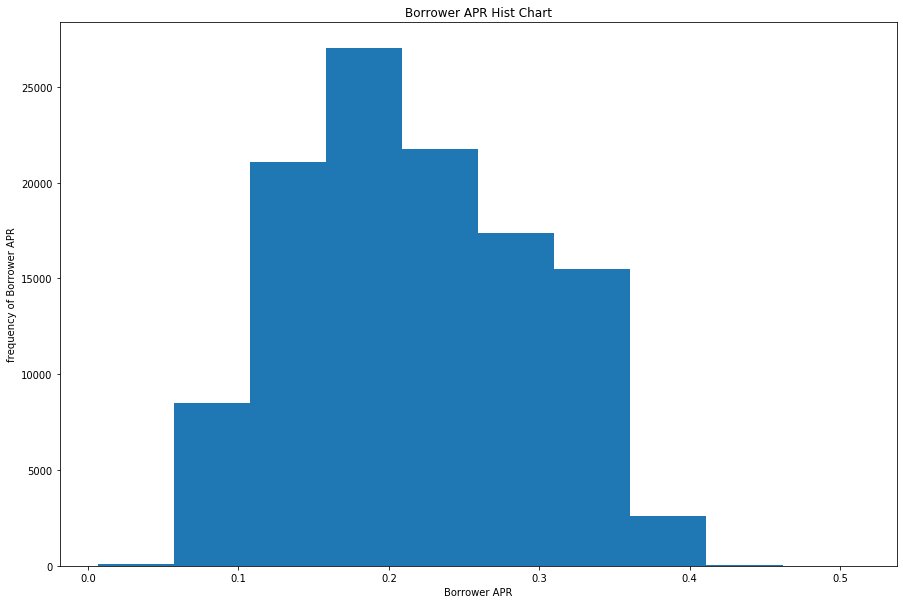

In [37]:
hist_plot('BorrowerAPR', 'Borrower APR', 'frequency of Borrower APR', 'Borrower APR Hist Chart')

Most of the value of BorrowerAPR is between 0.1 and 0.3 

### Borrower Rate
is the percentage of the total outstanding loan that you will pay to the lender.

In [38]:
df.BorrowerRate.value_counts()

0.3177    3672
0.3500    1905
0.3199    1651
0.2900    1508
0.2699    1319
          ... 
0.1287       1
0.2852       1
0.2768       1
0.0559       1
0.2192       1
Name: BorrowerRate, Length: 2294, dtype: int64

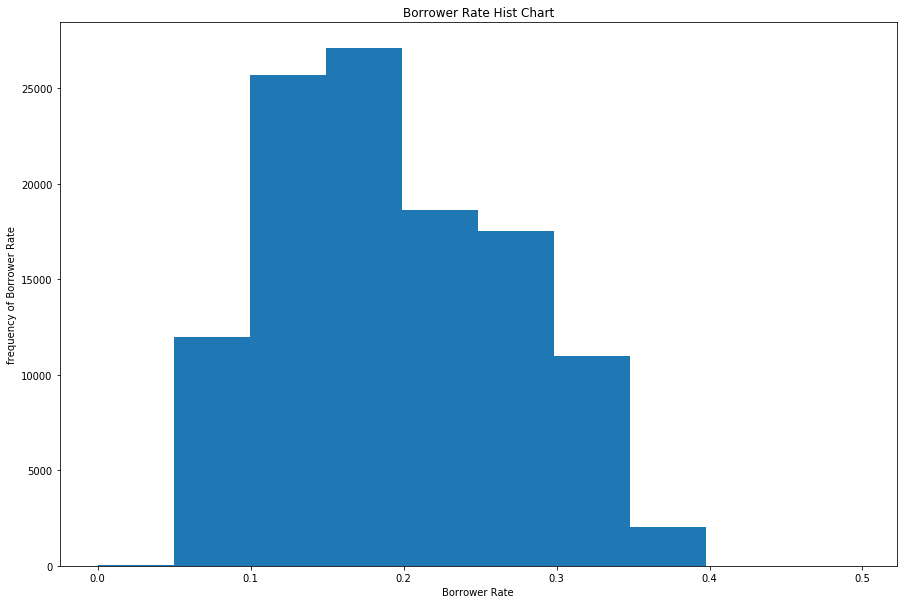

In [39]:
hist_plot('BorrowerRate', 'Borrower Rate', 'frequency of Borrower Rate', 'Borrower Rate Hist Chart')

Most of the Borrow rate between 0.1 and 0.3

### Debt to income Ratio:

In [40]:
df.DebtToIncomeRatio.value_counts()

0.18000    4132
0.22000    3687
0.17000    3616
0.14000    3553
0.20000    3481
           ... 
0.09206       1
0.13774       1
0.04983       1
0.15248       1
0.06056       1
Name: DebtToIncomeRatio, Length: 1207, dtype: int64

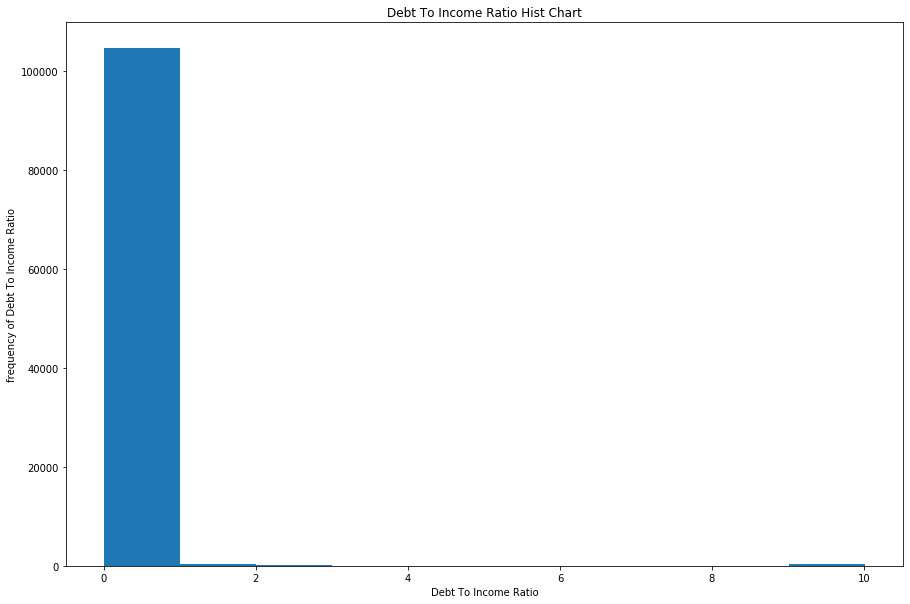

In [41]:
hist_plot('DebtToIncomeRatio', 'Debt To Income Ratio', 'frequency of Debt To Income Ratio', 'Debt To Income Ratio Hist Chart')

The most of the values (Debit to Income Ratio) less than 0.1

### Lender Yield:

Yield refers to the earnings from an investment over a specific period. It includes the investor earning such as interest and dividends received by holding particular investments. Yield is also the annual profit that an investor receives for an investment.

In [42]:
df.LenderYield.value_counts()

 0.3077    3672
 0.3400    1916
 0.3099    1651
 0.2599    1318
 0.1450    1011
           ... 
 0.2248       1
 0.2552       1
-0.0095       1
 0.2522       1
 0.2227       1
Name: LenderYield, Length: 2283, dtype: int64

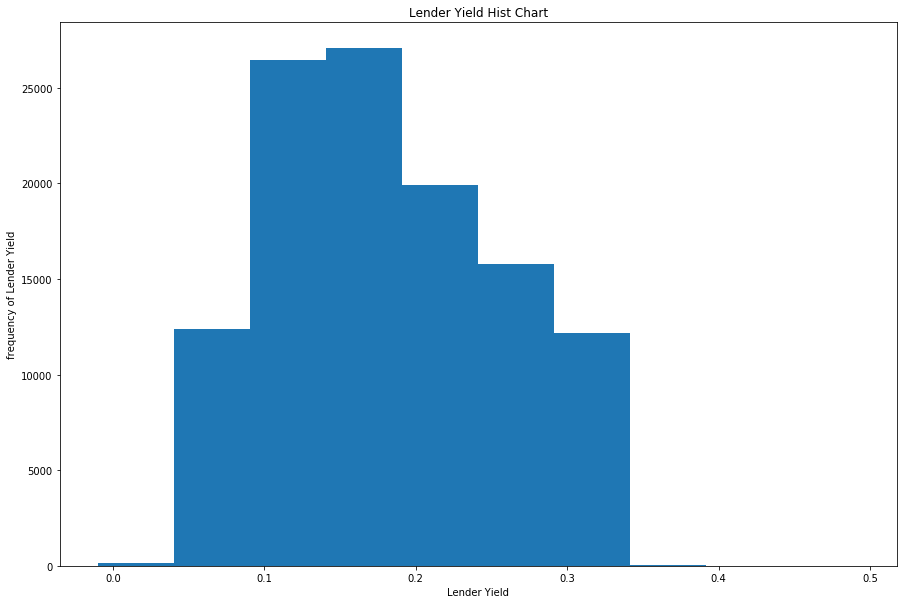

In [43]:
hist_plot('LenderYield', 'Lender Yield', 'frequency of Lender Yield', 'Lender Yield Hist Chart')

Most of the values (Lender Yield) between 0.1 and 0.3.

### Borrower State:

In [44]:
df.BorrowerState.value_counts()

CA    14717
TX     6842
NY     6729
FL     6720
IL     5921
GA     5008
OH     4197
MI     3593
VA     3278
NJ     3097
NC     3084
WA     3048
PA     2972
MD     2821
MO     2615
MN     2318
MA     2242
CO     2210
IN     2078
AZ     1901
WI     1842
OR     1817
TN     1737
AL     1679
CT     1627
SC     1122
NV     1090
KS     1062
KY      983
OK      971
LA      954
UT      877
AR      855
MS      787
NE      674
ID      599
NH      551
NM      472
RI      435
HI      409
WV      391
DC      382
MT      330
DE      300
VT      207
AK      200
SD      189
IA      186
WY      150
ME      101
ND       52
Name: BorrowerState, dtype: int64

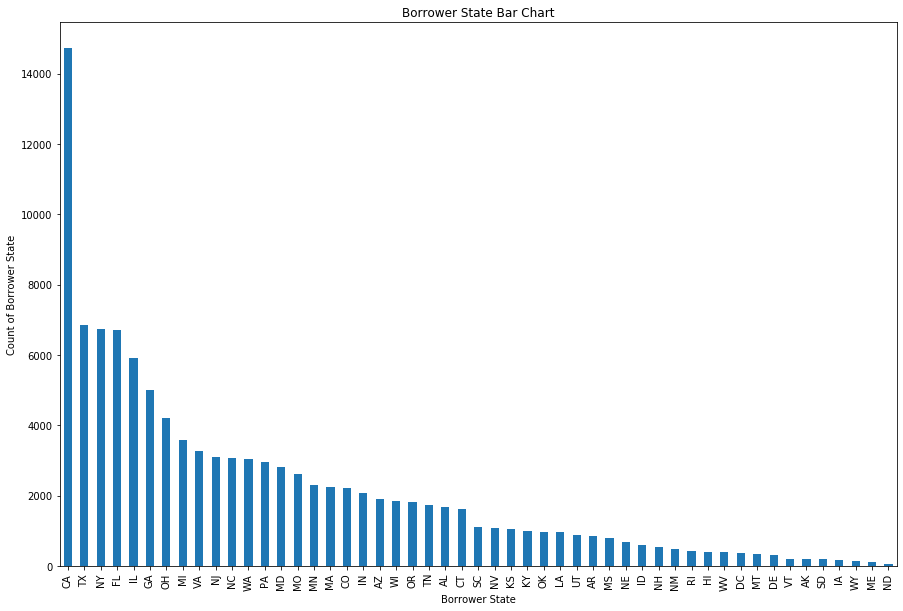

In [28]:
bar_plot('BorrowerState', 'Borrower State', 'Count of Borrower State', 'Borrower State Bar Chart')

   The hiest value of BorrowerState is CA.

## Credit score ranges 
Bad credit, in the 300-629 range, can make it difficult to qualify for credit, leaving you with few good options when you need to borrow money.
Fair credit, in the 630-689 range, gives you more options, but you'll likely pay higher interest and will have a limited choice of credit cards.
Good credit, in the 690-719 range, can give you lower interest rates and more choices.
Excellent credit of 720 and up can give you access to most rewards credit cards and the lowest interest rates offered.

### How does your credit score affect your life?
Even if your score is in the low 500s, you may still be able to get credit, but it will come with very high interest rates or with specific conditions, such as depositing money to get a secured credit card. You may have to pay more for car insurance or put down deposits on utilities.
But as you add points to your score, you’ll have access to more credit products — and pay less to use them.

In [45]:
df['CreditScoreRangeAverage'] = (df['CreditScoreRangeUpper'] + df['CreditScoreRangeLower']) / 2

In [46]:
df.CreditScoreRangeAverage.value_counts()

689.5    16492
669.5    16366
709.5    15471
729.5    12923
649.5    12199
749.5     9267
769.5     6606
789.5     4624
629.5     4172
609.5     3602
809.5     2644
529.5     1593
549.5     1474
829.5     1409
569.5     1357
589.5     1125
849.5      567
509.5      554
489.5      346
869.5      212
469.5      141
9.5        133
449.5       36
889.5       27
429.5        5
369.5        1
Name: CreditScoreRangeAverage, dtype: int64

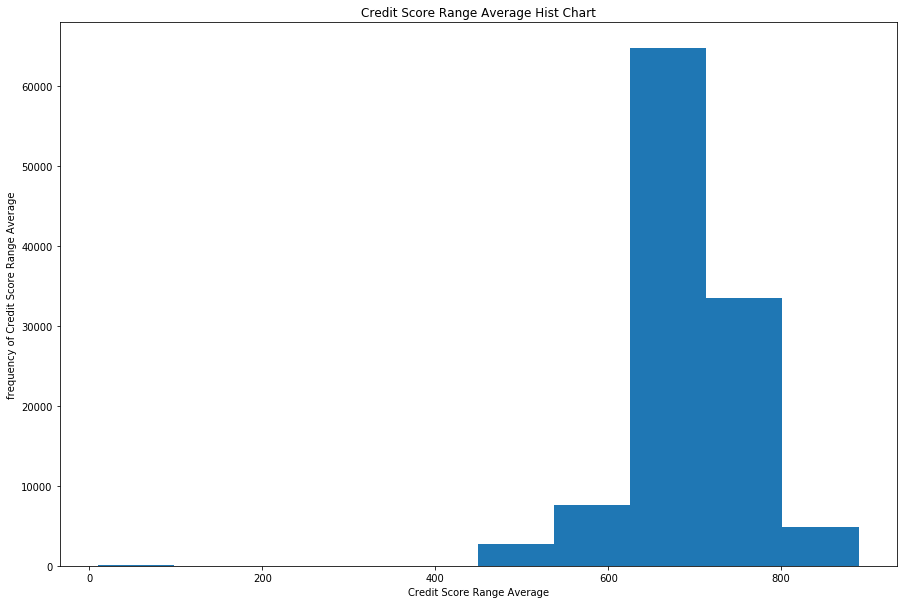

In [47]:
hist_plot('CreditScoreRangeAverage', 'Credit Score Range Average', 'frequency of Credit Score Range Average', 'Credit Score Range Average Hist Chart')

Most of the values (CreditScoreRangeAverage) from 600 to 800.

### IncomeRange:

In [54]:
df[['IncomeLower','IncomeUpper']] = df.IncomeRange.str.split("-",expand=True,)

In [55]:
df['IncomeLower'] = df['IncomeLower'].str.replace('$','')
df['IncomeLower'] = df['IncomeLower'].str.replace('+','')
df['IncomeLower'] = df['IncomeLower'].str.replace('Not employed','0')
df['IncomeLower'] = df['IncomeLower'].str.replace('Not displayed','0')
df['IncomeUpper'] = df['IncomeUpper'].str.replace('$','')
df['IncomeUpper'] = df['IncomeUpper'].str.replace('+','')
df['IncomeUpper'] = df['IncomeUpper'].str.replace('Not employed','0')
df['IncomeUpper'] = df['IncomeUpper'].str.replace('Not displayed','0')
df['IncomeLower'] = df['IncomeLower'].str.replace('None','0')
df['IncomeUpper'] = df['IncomeUpper'].str.replace('None','0')

In [56]:
df.IncomeLower.value_counts()

25,000     32192
50,000     31050
100,000    17337
75,000     16916
0           8547
1           7274
0            621
Name: IncomeLower, dtype: int64

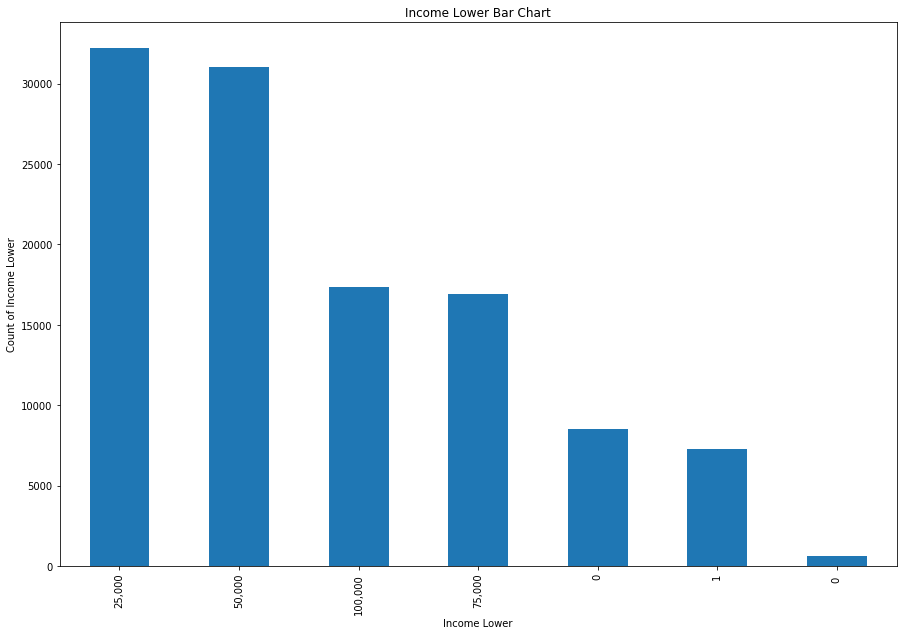

In [63]:
bar_plot('IncomeLower', 'Income Lower', 'Count of Income Lower', 'Income Lower Bar Chart')

The highst value (IncomeLower ) is 25000.

### Stated Monthly Income:

In [64]:
df.StatedMonthlyIncome.value_counts()

4166.666667     3526
5000.000000     3389
3333.333333     2917
3750.000000     2428
5416.666667     2374
                ... 
4436.333333        1
12866.666670       1
3825.083333        1
2704.333333        1
5203.333333        1
Name: StatedMonthlyIncome, Length: 13502, dtype: int64

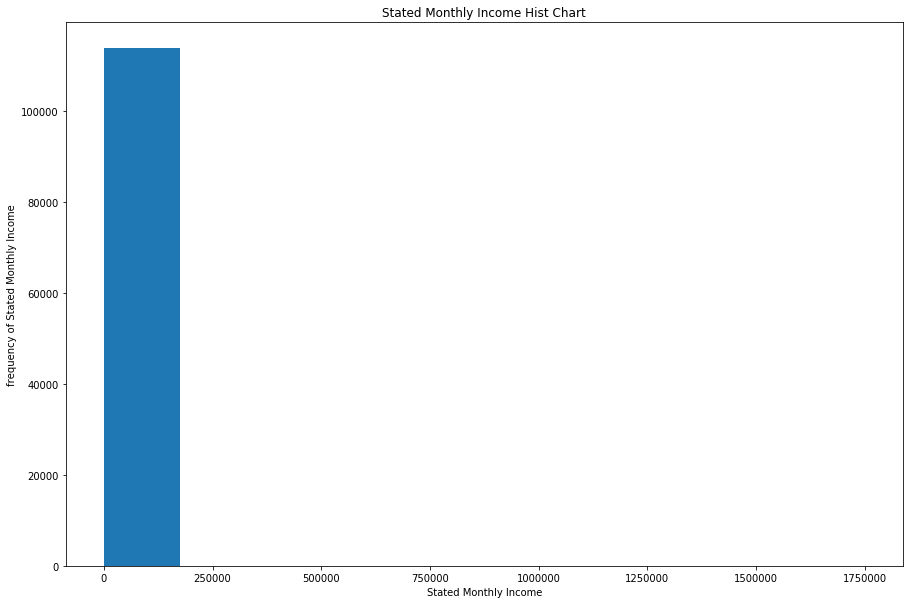

In [60]:
hist_plot('StatedMonthlyIncome', 'Stated Monthly Income', 'frequency of Stated Monthly Income', 'Stated Monthly Income Hist Chart')

Most of them has monthly income less than 250000.

### Investors:

In [65]:
df.Investors.value_counts()

1      27814
2       1386
3        991
4        827
5        753
       ...  
881        1
801        1
752        1
715        1
831        1
Name: Investors, Length: 751, dtype: int64

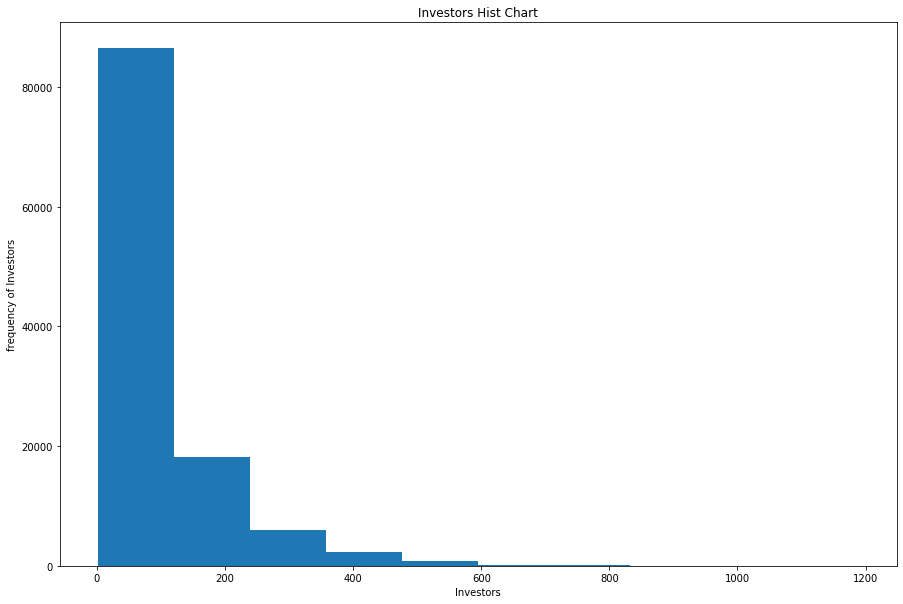

In [67]:
hist_plot('Investors', 'Investors', 'frequency of Investors', 'Investors Hist Chart')

Most No. Investors less than 200.



> ### IncomeRange:

This column includes the upper and lower amount of the income together and this makes it impossible to make any operations on it ... 



> I had to separate the values in two columns and make some operations to remove the $, - and + from it.

## Bivariate Exploration



### LoanOriginalAmount and  BorrowerAPR :

Text(0.5, 1.0, 'LoanOriginalAmount and BorrowerAPR regplot')

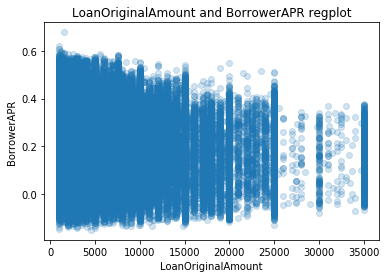

In [87]:
sb.regplot(data = df, x = 'LoanOriginalAmount', y = 'BorrowerAPR', fit_reg = False, x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/5})
plt.title('LoanOriginalAmount and BorrowerAPR regplot')

The relation between LoanOriginalAmount and BorrowerAPR  is not clear.

### LoanOriginalAmount and BorrowerRate :

Text(0.5, 1.0, 'LoanOriginalAmount and BorrowerRate regplot')

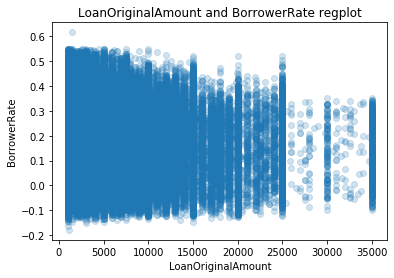

In [81]:
sb.regplot(data = df, x = 'LoanOriginalAmount', y = 'BorrowerRate', fit_reg = False, x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/5})
plt.title('LoanOriginalAmount and BorrowerRate regplot')

The relation between LoanOriginalAmount and BorrowerRate is not clear.

### BorrowerRate and BorrowerAPR:

Text(0.5, 1.0, 'Borrower Rate and Borrower APR Scatter Chart')

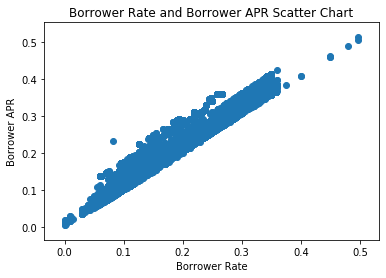

In [72]:
plt.scatter(data = df, x = 'BorrowerRate', y = 'BorrowerAPR')
plt.xlabel('Borrower Rate')
plt.ylabel('Borrower APR')
plt.title('Borrower Rate and Borrower APR Scatter Chart')

Positive strong relationship between BorrowerRate and BorrowerAPR.

### BorrowerAPR and LenderYield :

Text(0.5, 1.0, 'Borrower APR and Lender Yield Scatter Chart')

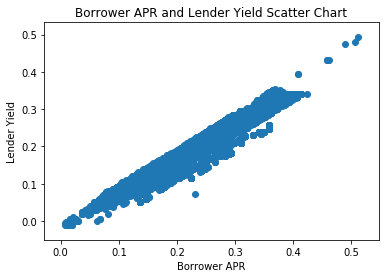

In [71]:
plt.scatter(data = df, x = 'BorrowerAPR', y = 'LenderYield')
plt.xlabel('Borrower APR')
plt.ylabel('Lender Yield')
plt.title('Borrower APR and Lender Yield Scatter Chart')

Positive strong relationship between BorrowerAPR and LenderYield.

### CreditScoreRangeAverage and LoanOriginalAmount :

Text(0.5, 1.0, 'CreditScoreRangeAverage and LoanOriginalAmount regplot')

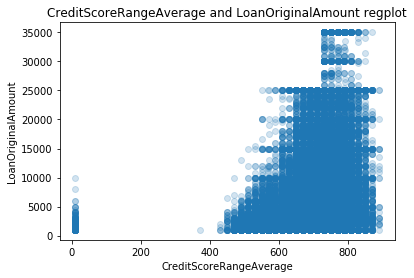

In [86]:
sb.regplot(data = df, x = 'CreditScoreRangeAverage', y = 'LoanOriginalAmount', fit_reg = False, x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/5})
plt.title('CreditScoreRangeAverage and LoanOriginalAmount regplot')

The relation between CreditScoreRangeAverage and LoanOriginalAmount is not clear



> There is a positive strong relation between 'BorrowerAPR' and 'LenderYield' ... when the BorrowerAPR increase the LenderYield increase.



## Multivariate Exploration



### Loan Status, Loan Original Amount and Borrower APR:

Text(0.5, 1, 'LoanOriginalAmount, BorrowerAPR and LoanStatus Chart')

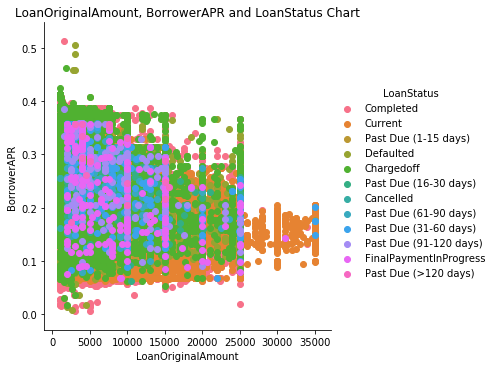

In [83]:
g = sb.FacetGrid(data = df, hue = 'LoanStatus', height = 5)
g.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerAPR')
g.add_legend();
plt.title('LoanOriginalAmount, BorrowerAPR and LoanStatus Chart')

The Completed and Chargedoff take the lowest Loan Orignial Amount and High Borrower APR.

### Employment Status, Loan Original Amount and Borrower APR:

Text(0.5, 1, 'LoanOriginalAmount, BorrowerAPR and EmploymentStatus Chart')

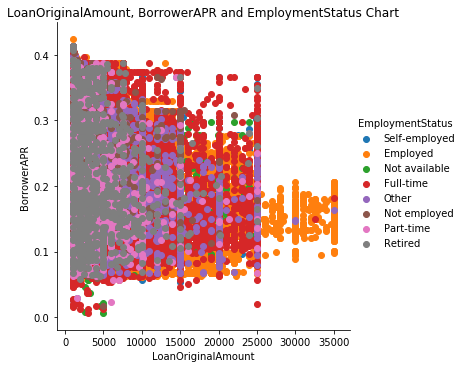

In [82]:
g = sb.FacetGrid(data = df, hue = 'EmploymentStatus', height = 5)
g.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerAPR')
g.add_legend();
plt.title('LoanOriginalAmount, BorrowerAPR and EmploymentStatus Chart')

The Retired and Part-time empolyments take the lowest Loan Orignial Amount and High Borrower APR.

### LoanOriginalAmount, BorrowerAPR and LenderYield:

Text(0.5, 1.0, 'Loan Original Amount, Borrower APR and Lender Yield Scatter Chart')

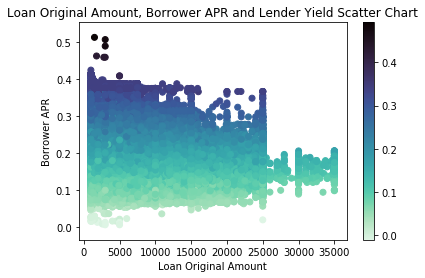

In [79]:
plt.scatter(data = df, x = 'LoanOriginalAmount', y = 'BorrowerAPR', c = 'LenderYield', cmap = 'mako_r')
plt.colorbar()
plt.xlabel('Loan Original Amount')
plt.ylabel('Borrower APR')
plt.title('Loan Original Amount, Borrower APR and Lender Yield Scatter Chart')

The highest value of Lender Yield occured when the value of Loan Original Amount is lowest and the value of Borrower APR is higest.